# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [118]:
import pandas as pd

In [119]:
cms_14 = pd.read_csv('/data/cms2014.csv')
cms_15 = pd.read_csv('/data/cms2015.csv')
cms_16 = pd.read_csv('/data/cms2016.csv')
npidata = pd.read_csv('/data/npidata.csv')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [120]:
cms_14.columns

Index(['nbr', 'npi', 'provider_type', 'medicare_participation_indicator',
       'number_of_hcpcs', 'total_services', 'total_unique_benes',
       'total_submitted_chrg_amt', 'total_medicare_allowed_amt',
       'total_medicare_payment_amt', 'total_medicare_stnd_amt',
       'drug_suppress_indicator', 'number_of_drug_hcpcs',
       'total_drug_services', 'total_drug_unique_benes',
       'total_drug_submitted_chrg_amt', 'total_drug_medicare_allowed_amt',
       'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt',
       'med_suppress_indicator', 'number_of_med_hcpcs', 'total_med_services',
       'total_med_unique_benes', 'total_med_submitted_chrg_amt',
       'total_med_medicare_allowed_amt', 'total_med_medicare_payment_amt',
       'total_med_medicare_stnd_amt', 'beneficiary_average_age',
       'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count',
       'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count',
       'beneficiary_female_count', 'ben

In [121]:
#need to make all columns in cms_14 lowercase
cms_14.columns=cms_14.columns.str.lower()

In [122]:
cms_15.columns

Index(['nbr', 'npi', 'provider_type', 'medicare_participation_indicator',
       'number_of_hcpcs', 'total_services', 'total_unique_benes',
       'total_submitted_chrg_amt', 'total_medicare_allowed_amt',
       'total_medicare_payment_amt', 'total_medicare_stnd_amt',
       'drug_suppress_indicator', 'number_of_drug_hcpcs',
       'total_drug_services', 'total_drug_unique_benes',
       'total_drug_submitted_chrg_amt', 'total_drug_medicare_allowed_amt',
       'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt',
       'med_suppress_indicator', 'number_of_med_hcpcs', 'total_med_services',
       'total_med_unique_benes', 'total_med_submitted_chrg_amt',
       'total_med_medicare_allowed_amt', 'total_med_medicare_payment_amt',
       'total_med_medicare_stnd_amt', 'beneficiary_average_age',
       'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count',
       'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count',
       'beneficiary_female_count', 'ben

In [123]:
#need to make all columns in cms_15 lowercase
cms_15.columns=cms_15.columns.str.lower()

In [124]:
cms_16.columns

Index(['nbr', 'NPI', 'PROVIDER_TYPE', 'MEDICARE_PARTICIPATION_INDICATOR',
       'NUMBER_OF_HCPCS', 'TOTAL_SERVICES', 'TOTAL_UNIQUE_BENES',
       'TOTAL_SUBMITTED_CHRG_AMT', 'TOTAL_MEDICARE_ALLOWED_AMT',
       'TOTAL_MEDICARE_PAYMENT_AMT', 'TOTAL_MEDICARE_STND_AMT',
       'DRUG_SUPPRESS_INDICATOR', 'NUMBER_OF_DRUG_HCPCS',
       'TOTAL_DRUG_SERVICES', 'TOTAL_DRUG_UNIQUE_BENES',
       'TOTAL_DRUG_SUBMITTED_CHRG_AMT', 'TOTAL_DRUG_MEDICARE_ALLOWED_AMT',
       'TOTAL_DRUG_MEDICARE_PAYMENT_AMT', 'TOTAL_DRUG_MEDICARE_STND_AMT',
       'MED_SUPPRESS_INDICATOR', 'NUMBER_OF_MED_HCPCS', 'TOTAL_MED_SERVICES',
       'TOTAL_MED_UNIQUE_BENES', 'TOTAL_MED_SUBMITTED_CHRG_AMT',
       'TOTAL_MED_MEDICARE_ALLOWED_AMT', 'TOTAL_MED_MEDICARE_PAYMENT_AMT',
       'TOTAL_MED_MEDICARE_STND_AMT', 'BENEFICIARY_AVERAGE_AGE',
       'BENEFICIARY_AGE_LESS_65_COUNT', 'BENEFICIARY_AGE_65_74_COUNT',
       'BENEFICIARY_AGE_75_84_COUNT', 'BENEFICIARY_AGE_GREATER_84_COUNT',
       'BENEFICIARY_FEMALE_COUNT', 'BEN

In [125]:
#need to make all columns in cms_16 lowercase
cms_16.columns=cms_16.columns.str.lower()

## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [126]:
### SOLUTION
answer = pd.concat([cms_14,cms_15,cms_16], keys = [2014,2015,2016])

In [127]:
answer.head()

nbr         npi                    provider_type  \
2014 0    1  1003000134                        Pathology   
     1   19  1003001249               Physical Therapist   
     2   21  1003001322  Mass Immunization Roster Biller   
     3   37  1003002486                     Chiropractic   
     4   73  1003005430            Clinical Psychologist   

       medicare_participation_indicator  number_of_hcpcs  total_services  \
2014 0                                Y               13          8643.0   
     1                                Y                4          1221.0   
     2                                Y                7           788.0   
     3                                Y                2           142.0   
     4                                Y                3           130.0   

        total_unique_benes  total_submitted_chrg_amt  \
2014 0                4276                1357139.00   
     1                  69                  88686.28   
     2                 370                  21640.24   
     3                  22                   7458.44   
     4                  11                  20640.00   

        total_medicare_allowed_amt  total_medicare_payment_amt  ...  \
2014 0                   321641.88                   245364.34  ...   
     1                    34060.09                    26055.17  ...   
     2                    21634.91                    21199.22  ...   
     3                     5037.51                     3727.01  ...   
     4                    14968.22                    11334.69  ...   

        beneficiary_cc_depr_percent beneficiary_cc_diab_percent  \
2014 0                         12.0                        20.0   
     1                          NaN                        39.0   
     2                         13.0                        18.0   
     3                          NaN                         NaN   
     4                          NaN                         NaN   

        beneficiary_cc_hyperl_percent  beneficiary_cc_hypert_percent  \
2014 0                           53.0                           57.0   
     1                           64.0                           75.0   
     2                           42.0                           49.0   
     3                           59.0                           59.0   
     4                            NaN                            NaN   

        beneficiary_cc_ihd_percent  beneficiary_cc_ost_percent  \
2014 0                        28.0                         9.0   
     1                        32.0                         NaN   
     2                        24.0                         5.0   
     3                         NaN                         0.0   
     4                         NaN                         0.0   

        beneficiary_cc_raoa_percent  beneficiary_cc_schiot_percent  \
2014 0                         37.0                            1.0   
     1                         68.0                            NaN   
     2                         25.0                            NaN   
     3                         64.0                            0.0   
     4                          NaN                            0.0   

        beneficiary_cc_strk_percent beneficiary_average_risk_score  
2014 0                          3.0                         1.0007  
     1                          NaN                         1.1912  
     2                          3.0                         0.8019  
     3                          0.0                         0.7920  
     4                          NaN                         0.9718  

[5 rows x 59 columns]

In [128]:
answer.reset_index()

,level_0,level_1,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score
0,2014,0,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,...,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007
1,2014,1,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,...,NaN,39.0,64.0,75.0,32.0,NaN,68.0,NaN,NaN,1.1912
2,2014,2,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,...,13.0,18.0,42.0,49.0,24.0,5.0,25.0,NaN,3.0,0.8019
3,2014,3,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,...,NaN,NaN,59.0,59.0,NaN,0.0,64.0,0.0,0.0,0.7920
4,2014,4,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.9718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193857,2016,66224,1053890,1992995542,Ophthalmology,Y,49,2623.0,611,845229.00,...,11.0,58.0,54.0,75.0,38.0,7.0,48.0,NaN,7.0,1.8015
193858,2016,66225,1053892,1992995591,Obstetrics & Gynecology,Y,18,27.0,17,9800.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.4364
193859,2016,66226,1053900,1992996219,Neurology,Y,25,1121.0,620,565393.00,...,46.0,36.0,54.0,68.0,45.0,5.0,40.0,12.0,31.0,2.3548
193860,2016,66227,1053901,1992996284,Internal Medicine,Y,21,4501.6,381,194576.60,...,34.0,57.0,64.0,75.0,62.0,12.0,75.0,9.0,12.0,2.4551


In [129]:
answer.index.levels[0]

Int64Index([2014, 2015, 2016], dtype='int64')

In [130]:
answer.reset_index(inplace=True)

In [131]:
#create year column
answer['year']= answer['level_0']

In [132]:
answer.head()

,level_0,level_1,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,...,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score,year
0,2014,0,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,...,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007,2014
1,2014,1,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,...,39.0,64.0,75.0,32.0,NaN,68.0,NaN,NaN,1.1912,2014
2,2014,2,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,...,18.0,42.0,49.0,24.0,5.0,25.0,NaN,3.0,0.8019,2014
3,2014,3,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,...,NaN,59.0,59.0,NaN,0.0,64.0,0.0,0.0,0.7920,2014
4,2014,4,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.9718,2014


In [133]:
#drop unneeded columns
answer= answer.drop(columns=['level_0','level_1'])

In [134]:
assert(answer.shape == (193862, 60))
assert(list(answer['year'].unique()) == [2014,2015,2016])
assert(set(answer.columns.str.lower()) == set(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_race_other_count', 'beneficiary_nondual_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score']))

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **/data/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

In [135]:
npidata.columns

Index(['row', 'NPI', 'Entity Type Code', 'Replacement NPI',
       'Employer Identification Number (EIN)',
       'Provider Organization Name (Legal Business Name)',
       'Provider Last Name (Legal Name)', 'Provider First Name',
       'Provider Middle Name', 'Provider Name Prefix Text',
       'Provider Name Suffix Text', 'Provider Credential Text',
       'Provider Other Organization Name',
       'Provider Other Organization Name Type Code',
       'Provider Other Last Name', 'Provider Other First Name',
       'Provider Other Middle Name', 'Provider Other Name Prefix Text',
       'Provider Other Name Suffix Text', 'Provider Other Credential Text',
       'Provider Other Last Name Type Code',
       'Provider First Line Business Mailing Address',
       'Provider Second Line Business Mailing Address',
       'Provider Business Mailing Address City Name',
       'Provider Business Mailing Address State Name',
       'Provider Business Mailing Address Postal Code',
       'Provider

In [136]:
### SOLUTION
answer = pd.merge(answer,npidata, left_on='npi', right_on = 'NPI', how='left')

In [137]:
answer.head()

,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,...,Provider Business Practice Location Address Postal Code,Provider Business Practice Location Address Country Code (If outside U.S.),Provider Business Practice Location Address Telephone Number,Provider Business Practice Location Address Fax Number,Provider Enumeration Date,Last Update Date,NPI Deactivation Reason Code,NPI Deactivation Date,NPI Reactivation Date,Provider Gender Code
0,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,321641.88,245364.34,...,602011718,US,8475702040,8.477335e+09,08/31/2007,08/06/2008,NaN,NaN,NaN,M
1,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,34060.09,26055.17,...,618321159,US,2174467878,2.174468e+09,09/11/2007,07/13/2010,NaN,NaN,NaN,M
2,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,21634.91,21199.22,...,644681610,US,6605622755,6.605625e+09,09/10/2007,09/10/2007,NaN,NaN,NaN,NaN
3,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,5037.51,3727.01,...,630903303,US,6362399997,6.362400e+09,09/19/2007,02/19/2019,NaN,NaN,NaN,F
4,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,14968.22,11334.69,...,60463,US,7089237400,7.089237e+09,10/22/2007,10/22/2007,NaN,NaN,NaN,F


In [138]:
import numpy
assert(answer.shape == (193862, 103))
assert(list(answer['Provider Business Mailing Address State Name'].unique()) == ['IL','MO',numpy.nan,'WY'])
assert(list(answer.groupby('Provider Business Mailing Address State Name').NPI.count()) == [111520, 53366, 4805])

## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [139]:
### SOLUTION
answer['State'] = answer['Provider Business Mailing Address State Name'].fillna('XX')

In [140]:
answer['Provider Business Mailing Address State Name'].value_counts()

IL    111520
MO     53366
WY      4805
Name: Provider Business Mailing Address State Name, dtype: int64

In [141]:
answer['State'].value_counts()

IL    111520
MO     53366
XX     24171
WY      4805
Name: State, dtype: int64

In [142]:
assert(list(answer.groupby('State').npi.count()) == [111520, 53366, 4805, 24171])
assert(answer.shape == (193862, 104))

In [143]:
answer.columns

Index(['nbr', 'npi', 'provider_type', 'medicare_participation_indicator',
       'number_of_hcpcs', 'total_services', 'total_unique_benes',
       'total_submitted_chrg_amt', 'total_medicare_allowed_amt',
       'total_medicare_payment_amt',
       ...
       'Provider Business Practice Location Address Country Code (If outside U.S.)',
       'Provider Business Practice Location Address Telephone Number',
       'Provider Business Practice Location Address Fax Number',
       'Provider Enumeration Date', 'Last Update Date',
       'NPI Deactivation Reason Code', 'NPI Deactivation Date',
       'NPI Reactivation Date', 'Provider Gender Code', 'State'],
      dtype='object', length=104)

## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

In [144]:
%matplotlib inline


### SOLUTION
import numpy as np
answer = answer.pivot_table(
    values='total_services', 
    index='State', 
    columns='year', 
    aggfunc=np.ma.sum, 
    fill_value=0)

In [145]:
answer

year,2014,2015,2016
State,,,
IL,101393758.4,103048716.3,105432032.4
MO,48577227.1,50808468.0,50854632.1
WY,3487240.6,3800978.9,3604487.9
XX,14938636.4,16533705.2,16705781.4


In [147]:
assert(answer.shape == (4,3))
assert(answer.sum().sum() == 519185664.6999999)
assert(answer[2016].sum() == 176596933.80000004)
assert(answer.loc['WY'].sum() == 10892707.4)

AssertionError: 

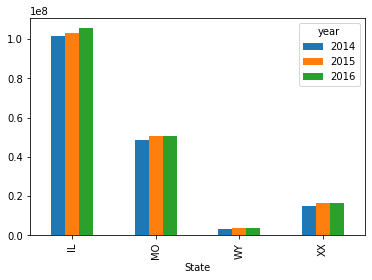

In [148]:
%matplotlib inline
answer.plot.bar()



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

---

In [1]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add week14_assignment.ipynb
    !git commit -a -m "Submitting the week 14 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 



    
OK. We can wait.

